In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [5]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


In [6]:
c = cast
c = c.merge(release_dates, on=['title', 'year'])

### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

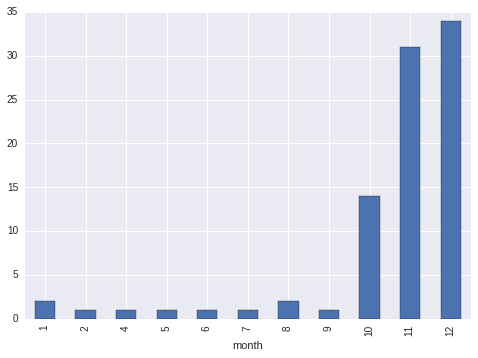

In [16]:
release_dates['month'] = release_dates['date'].dt.month
release_dates[(release_dates.title.str.contains("Christmas")) & (release_dates.country == 'USA')].groupby('month').size().plot(kind = 'bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

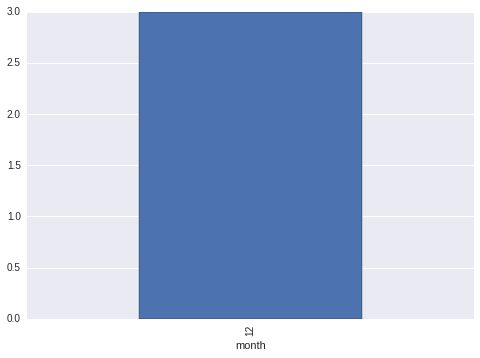

In [17]:
release_dates[(release_dates.title.str.startswith("The Hobbit"))& (release_dates.country == 'USA')].groupby('month').size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

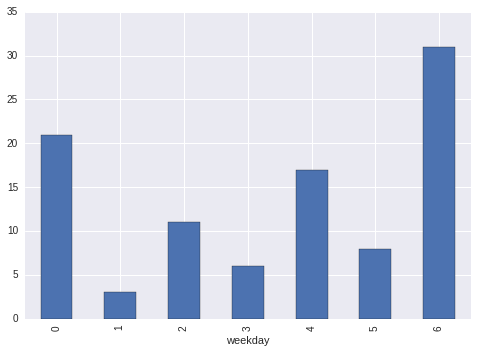

In [18]:
release_dates['weekday'] = release_dates['date'].dt.dayofweek
release_dates[(release_dates.title.str.contains("Romance"))& (release_dates.country == 'USA')].groupby('weekday').size().plot(kind = 'bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

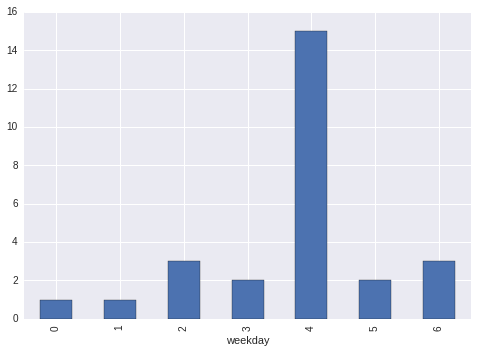

In [19]:
release_dates['weekday'] = release_dates['date'].dt.dayofweek
release_dates[(release_dates.title.str.contains("Action"))& (release_dates.country == 'USA')].groupby('weekday').size().plot(kind = 'bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [7]:
c[(c.name == 'Judi Dench') & (c.year // 10 == 199) & (c.country == 'USA')]

,title,year,name,type,character,n,country,date
415938,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
1245376,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
4019676,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
5686475,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19
6490589,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
12669401,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
13050988,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
15475364,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-07-18


### In which months do films with Judi Dench tend to be released in the USA?

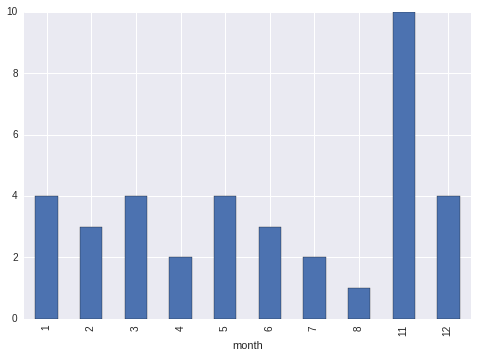

In [10]:
c['month'] = c['date'].dt.month
c[(c.name == 'Judi Dench') & (c.country == 'USA')].groupby('month').size().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

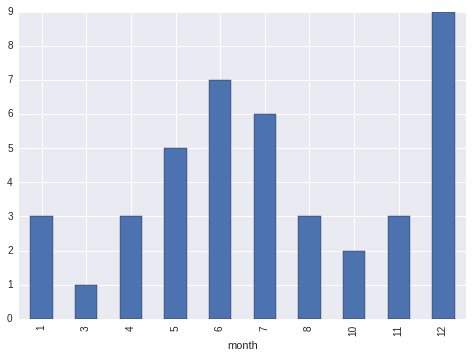

In [11]:
c[(c.name == 'Tom Cruise') & (c.country == 'USA')].groupby('month').size().plot(kind='bar')